# **Data Engineering**

***

## **1. Background**

### **Now it’s time for feature engineering**

**Estelle** reviewed your work with the AD and Estelle has come up with an idea to enrich the dataset when trying to predict churn:

>  “I think that the difference between **off-peak** prices in December and January the preceding year could be a significant feature when predicting churn”

- As the Data Scientist on the team, you need to investigate this question. 
- So, in this task you’ll be responsible for completing feature engineering for the dataset.

### **What is feature engineering?**

Feature engineering refers to:

-   **`Addition`**
-  **`Deletion`**
-  **`Combination`**
-  **`Mutation`**

of your data set to improve machine learning model training, leading to better performance and greater accuracy.

- In context of this task, **feature engineering** refers to the engineering of the price and client data to create new columns that will help us to predict churn more accurately.
- Effective feature engineering is based on sound knowledge of the business problem and the available data sources.

### **What can we do**

**First - can we remove any of the columns in the datasets?**

- There will almost always be columns in a dataset that can be removed, perhaps because they are not relevant to the analysis, or they only have 1 unique value.

**Second - can we expand the datasets and use existing columns to create new features?**

    For example, if you have “date” columns, in their raw form they are not so useful. But if you were to extract month, day of month, day of year and year into individual columns, these could be more useful.

**Third - can we combine some columns together to create “better” columns?**

- How do we define a “better” column and how do we know which columns to combine? We’re trying to accurately predict churn - so a “better” column could be a column that improves the accuracy of the model.
- And which columns to combine? This can sometimes be a matter of experimenting until you find something useful, or you may notice that 2 columns share very similar information so you want to combine them.

**Finally - can we combine these datasets and if so, how?**

- To combine datasets, you need a column that features in both datasets that share the same values to join them on.

In [1]:
import warnings; warnings.filterwarnings('ignore')

In [3]:
!head -2 clean_data_after_eda.csv

id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0

***

## **2. Reading Updated Customer Dataset**

We have been given a newly **updated dataset**, which contains some new data columns
- We need to look into our newly update dataset and understand the changes

In [4]:
import pandas as pd
from pandas import option_context
import dask.dataframe as dd
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')

In [8]:
path = ''
path_csv = os.path.join(path,'clean_data_after_eda.csv')

# each row corresponds to data about the unique customer
clients = dd.read_csv(path_csv,
                    sep=',', 
                    blocksize="30M")

# standard processing
clients['date_activ'] = dd.to_datetime(clients['date_activ'], format='%Y-%m-%d')
clients['date_end'] = dd.to_datetime(clients['date_end'], format='%Y-%m-%d')
clients['date_modif_prod'] = dd.to_datetime(clients['date_modif_prod'], format='%Y-%m-%d')
clients['date_renewal'] = dd.to_datetime(clients['date_renewal'], format='%Y-%m-%d')

# show all rows in the dataframe
with option_context('display.max_columns', None):
    display(clients.head(5))

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


Lets check the data types in the dataset

In [9]:
clients.dtypes

id                                string[pyarrow]
channel_sales                     string[pyarrow]
cons_12m                                    int64
cons_gas_12m                                int64
cons_last_month                             int64
date_activ                         datetime64[ns]
date_end                           datetime64[ns]
date_modif_prod                    datetime64[ns]
date_renewal                       datetime64[ns]
forecast_cons_12m                         float64
forecast_cons_year                          int64
forecast_discount_energy                  float64
forecast_meter_rent_12m                   float64
forecast_price_energy_off_peak            float64
forecast_price_energy_peak                float64
forecast_price_pow_off_peak               float64
has_gas                           string[pyarrow]
imp_cons                                  float64
margin_gross_pow_ele                      float64
margin_net_pow_ele                        float64


<h4><b>Newly added features</b></h4>

Lets check the column feature data of our updated dataset

The updated dataframe contains a fair number of new numerical features, which will be useful for feature engineeing

```
var_year_price_off_peak_var               float64
var_year_price_peak_var                   float64
var_year_price_mid_peak_var               float64
var_year_price_off_peak_fix               float64
var_year_price_peak_fix                   float64
var_year_price_mid_peak_fix               float64
var_year_price_off_peak                   float64
var_year_price_peak                       float64
var_year_price_mid_peak                   float64
var_6m_price_off_peak_var                 float64
var_6m_price_peak_var                     float64
var_6m_price_mid_peak_var                 float64
var_6m_price_off_peak_fix                 float64
var_6m_price_peak_fix                     float64
var_6m_price_mid_peak_fix                 float64
var_6m_price_off_peak                     float64
var_6m_price_peak                         float64
var_6m_price_mid_peak                     float64
```

These new features contain the **yearly average** and **half a year averages** of the relevant columns

***

## **3. Reading Prices Dataset**

We have been suggested to utilise some data from the previously loaded dataset **`prices`**
- **`prices`** contains for each customer, the information about the pricing during the year
-  Notably: "difference between off-peak prices in December and January the preceding year"

<h4><b>What do the columns mean</b></h4>

Lets remind our selves what each column represents in the **`prices`** dataset

```
- id = client company identifier
- price_date = reference date
- price_off_peak_var = price of energy for the 1st period (off peak)
- price_peak_var = price of energy for the 2nd period (peak)
- price_mid_peak_var = price of energy for the 3rd period (mid peak)
- price_off_peak_fix = price of power for the 1st period (off peak)
- price_peak_fix = price of power for the 2nd period (peak)
- price_mid_peak_fix = price of power for the 3rd period (mid peak)
```

In [10]:
prices_path = os.path.join('','price.csv')

prices = dd.read_csv(prices_path,sep=',',blocksize="30M")
prices['price_date'] = dd.to_datetime(prices['price_date'], format='%Y-%m-%d')
prices.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


***

## **4. Adding Features**

### **4.1 | Difference in offpeak prices**

Lets focus on adding the feature that we were told about first!
- **Difference between off-peak prices** in December and preceding January
- We can do this by selecting the relevant dates and finding the **shift** value differences

In [11]:
temp = prices.copy()

In [12]:
# convert column to datetime
columns = ['id','price_date','price_off_peak_var','price_off_peak_fix']

# select both january and december rows  only
temp = temp[(temp['price_date'] == '2015-01-01') | (temp['price_date'] == '2015-12-01')][columns]
temp = temp.sort_values(by=['id','price_date'])
temp.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
72163,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
72174,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885
157109,0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,44.266931
157120,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710
168210,0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,44.444710


In [13]:
# find the difference between rows
temp['diff_price_off_peak_var'] = temp['price_off_peak_var'] - temp['price_off_peak_var'].shift(-1)
temp['diff_price_off_peak_fix'] = temp['price_off_peak_fix'] - temp['price_off_peak_fix'].shift(-1)
temp.head()

,id,price_date,price_off_peak_var,price_off_peak_fix,diff_price_off_peak_var,diff_price_off_peak_fix
72163,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969,0.006192,-0.162916
72174,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885,-0.028141,-3.538046
157109,0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,44.266931,0.004104,-0.177779
157120,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710,-0.006894,0.000000
168210,0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,44.444710,-0.050443,-1.500000


Now lets add these new features to the main datas of clients

In [14]:
# update clients
clients = clients.merge(temp,left_on='id',right_on='id')
clients.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,price_date,price_off_peak_var,price_off_peak_fix,diff_price_off_peak_var,diff_price_off_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,44.235794,2.086425,9.953056e+01,44.236702,1,2015-01-01,0.125976,40.565969,-0.020057,-3.700961
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,44.235794,2.086425,9.953056e+01,44.236702,1,2015-12-01,0.146033,44.266930,0.020057,3.700961
2,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.009485,1.217891e-03,0.000000,0,2015-01-01,0.151367,44.266931,0.003767,-0.177779
3,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.009485,1.217891e-03,0.000000,0,2015-12-01,0.147600,44.444710,-0.004845,0.177779
4,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000004,9.450150e-08,0.000000,0,2015-01-01,0.172468,44.266931,0.004670,-0.177779


<h4><b>Check the correlation to churn!</b></h4>

What about the correlation of this feature to **`churn`**

In [15]:
columns = ['diff_price_off_peak_var','diff_price_off_peak_fix','churn']

clients.loc[:,columns].select_dtypes(include=['float64','int64']).corr().round(2).compute().loc['churn'].to_frame()

,churn
diff_price_off_peak_var,-0.00
diff_price_off_peak_fix,0.01
churn,1.00


### **4.2 | Difference in offpeak prices**

This new feature doesn't seem to be that significant, lets keep searching!

- Lets return to our **`price`** dataframe and extract some more features that we might find relevant and should try out for our **churn model**
- We are given the prices for each individual **month**, so if take the averages from this data, it should vary slightly from those that we were given in the updated dataset

In [16]:
# Aggregate average prices per period by company
mean_prices = prices.groupby(['id']).agg({
'price_off_peak_var': 'mean', 
'price_peak_var': 'mean', 
'price_mid_peak_var': 'mean',
'price_off_peak_fix': 'mean',
'price_peak_fix': 'mean',
'price_mid_peak_fix': 'mean'    
}).reset_index()

In [17]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,038af19179925da21a25619c5a24b745,0.148550,0.000000,0.000000,44.355820,0.000000,0.000000,0.148550,0.000000,0.148550,44.355820,0.000000,44.355820
1,31f2ce549924679a3cbb2d128ae9ea43,0.123027,0.102637,0.073525,40.661003,24.396601,16.264402,0.020390,0.029112,0.049502,16.264402,8.132199,24.396601
2,36b6352b4656216bfdb96f01e9a94b4e,0.118912,0.098372,0.068964,40.633851,24.380309,16.253540,0.020540,0.029408,0.049948,16.253542,8.126769,24.380311
3,48f3e6e86f7a8656b2c6b6ce2763055e,0.145552,0.000000,0.000000,44.400265,0.000000,0.000000,0.145552,0.000000,0.145552,44.400265,0.000000,44.400265
4,cce88c7d721430d8bd31f71ae686c91e,0.131729,0.112062,0.082026,40.854928,24.595955,16.466472,0.019667,0.030036,0.049703,16.258972,8.129484,24.388456


In [18]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]

# update clients
clients = clients.merge(mean_prices[columns], left_on='id', right_on='id')

In [19]:
clients.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_off_peak_var,price_off_peak_fix,diff_price_off_peak_var,diff_price_off_peak_fix,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.125976,40.565969,-0.020057,-3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.146033,44.266930,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
2,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.151367,44.266931,0.003767,-0.177779,0.142485,0.007124,0.149609,44.311375,0.00000,44.311375
3,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,44.444710,-0.004845,0.177779,0.142485,0.007124,0.149609,44.311375,0.00000,44.311375
4,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.172468,44.266931,0.004670,-0.177779,0.082090,0.088421,0.170512,44.385450,0.00000,44.385450


**What these features add**

- This feature may be useful because it adds more granularity to the existing feature that my colleague found to be useful (found in the provided dataset)
- Instead of looking at differences across an entire year, we have now created features that look at mean average price differences across different time periods (**`off_peak`**, **`peak`**, **`mid_peak`**).
- The **dec-jan** feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.

In [20]:
clients.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

<h4><b>Check the correlation to churn!</b></h4>

**Lets also calculate the collation to churn**

In [22]:
columns = [ 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff',
    'churn'
]

In [23]:
clients.loc[:,columns].select_dtypes(include=['float64','int64']).corr().round(2).compute().loc['churn'].to_frame()

,churn
off_peak_peak_var_mean_diff,-0.03
peak_mid_peak_var_mean_diff,-0.01
off_peak_mid_peak_var_mean_diff,-0.03
off_peak_peak_fix_mean_diff,-0.04
peak_mid_peak_fix_mean_diff,0.05
off_peak_mid_peak_fix_mean_diff,-0.03
churn,1.00


### **4.3 | Max price changes across periods and months**

Remove the duplicates and get the mean value for the user, month combination

In [24]:
# Aggregate average prices per period by company
mean_prices_by_month = prices.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

Calculate the difference between the prices of **`off peak`** and **`peak`** for each month per user

In [25]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.151367,0.0,0.151367,44.266931,0.0,44.266931
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.151367,0.0,0.151367,44.266931,0.0,44.266931
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.151367,0.0,0.151367,44.266931,0.0,44.266931
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.149626,0.0,0.149626,44.266931,0.0,44.266931
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.149626,0.0,0.149626,44.266931,0.0,44.266931


Now from the above data, calculate the maximum difference between the **`price_off_peak_fix`** and **`price_peak_var`** to find the month where it maximum and get its value

In [26]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [27]:
columns = [
                            'id',
                            'off_peak_peak_var_max_monthly_diff',
                            'peak_mid_peak_var_max_monthly_diff',
                            'off_peak_mid_peak_var_max_monthly_diff',
                            'off_peak_peak_fix_max_monthly_diff',
                            'peak_mid_peak_fix_max_monthly_diff',
                            'off_peak_mid_peak_fix_max_monthly_diff'
                        ]

# update cients
clients = clients.merge(max_diff_across_periods_months[columns], left_on='id', right_on='id')

In [28]:
clients.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.45067,26.040925,0.060550,0.085483,0.146033,44.26693,8.145775,44.26693
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.45067,26.040925,0.060550,0.085483,0.146033,44.26693,8.145775,44.26693
2,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.00000,44.311375,0.151367,0.085483,0.151367,44.44471,0.000000,44.44471
3,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.00000,44.311375,0.151367,0.085483,0.151367,44.44471,0.000000,44.44471
4,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.00000,44.385450,0.084587,0.089162,0.172468,44.44471,0.000000,44.44471


In [29]:
clients.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

**What these features add**

- Calculating the **maximum price change** of all the time periods would be a good feature to create because, as a utilities customer, there is nothing more annoying than sudden price changes between months, and a **large increase in prices** within a short time span would be an influencing factor in causing me to look at other utilities providers for a better deal
- Since we are trying to predict churn for this use case, I thought this would be an interesting feature to include.

<h4><b>Check the correlation to churn!</b></h4>

**Lets also calculate the correlation to churn**

In [42]:
columns = [
                            'off_peak_peak_var_max_monthly_diff',
                            'peak_mid_peak_var_max_monthly_diff',
                            'off_peak_mid_peak_var_max_monthly_diff',
                            'off_peak_peak_fix_max_monthly_diff',
                            'peak_mid_peak_fix_max_monthly_diff',
                            'off_peak_mid_peak_fix_max_monthly_diff',
                            'churn'
                        ]

test = clients[columns].copy()

In [43]:
test.select_dtypes(include=['float64','int64']).corr().round(2).compute().loc['churn'].to_frame()

,churn
off_peak_peak_var_max_monthly_diff,-0.02
peak_mid_peak_var_max_monthly_diff,0.00
off_peak_mid_peak_var_max_monthly_diff,-0.03
off_peak_peak_fix_max_monthly_diff,-0.03
peak_mid_peak_fix_max_monthly_diff,0.05
off_peak_mid_peak_fix_max_monthly_diff,-0.02
churn,1.00


Not too bad, we may have found some features that help the model

***

## **5. Further feature engineering**

### **5.1 | Tenure**

Some other features that we can add are **how long** a client has been with **PowerCo**, we have two features that can help us with realising this

```
    "date_activ": ["date of activation of the contract"],
    "date_end": ["registered date of the end of the contract"],
```

In [33]:
clients['tenure'] = ((clients['date_end'] - clients['date_activ'])/pd.Timedelta('365 days')).astype(int)
clients.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,18.590255,7.45067,26.040925,0.060550,0.085483,0.146033,44.26693,8.145775,44.26693,3
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,18.590255,7.45067,26.040925,0.060550,0.085483,0.146033,44.26693,8.145775,44.26693,3
2,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.311375,0.00000,44.311375,0.151367,0.085483,0.151367,44.44471,0.000000,44.44471,7
3,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.311375,0.00000,44.311375,0.151367,0.085483,0.151367,44.44471,0.000000,44.44471,7
4,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,44.385450,0.00000,44.385450,0.084587,0.089162,0.172468,44.44471,0.000000,44.44471,6


Lets evaluate the churn for each number of years a client been with the company

In [34]:
clients.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False).compute()

,churn
tenure,
2,0.168317
3,0.144158
4,0.127493
13,0.095238
5,0.092031
12,0.083333
7,0.075500
6,0.075439
11,0.059783


- We can see that the churn rate of customers in their first **4 years** is relatively high
- Comparing that in their **fifth year**, the churn reduces quite substantially, which we found out in our **EDA**

### **5.3 | Transforming numerical data**

<h4><b>Skewness</b></h4>

- In the previous section we saw that some variables were highly skewed
- The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it
- Such models are called **`parametric`** models, and they typically assume that all variables are both independent and normally distributed. 

<h4><b>Treatment</b></h4>

- Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

- There are many ways that you can treat skewed variables. You can apply transformations such as: **`Square root`**, **`Cubic root`**, **`Logarithm`**

<h4><b>Selected columns</b></h4>

- Let's apply logarithmic transformations only to a selected number of columns


In [36]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

clients[skewed].describe().compute()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,2.919000e+04,2.919000e+04,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000
mean,1.592285e+05,2.807021e+04,16092.905584,1868.220871,1400.011374,0.967283,63.086222,0.137286,0.050493,43.130243
std,5.734673e+05,1.628831e+05,64372.325502,2387.487112,3248.730182,5.110006,66.152296,0.024627,0.049036,4.487263
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.677250e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411600e+04,0.000000e+00,793.000000,1112.875000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378
75%,4.076300e+04,0.000000e+00,3383.000000,2400.240000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


In [37]:
# Apply log10 transformation
clients["cons_12m"] = np.log10(clients["cons_12m"] + 1)
clients["cons_gas_12m"] = np.log10(clients["cons_gas_12m"] + 1)
clients["cons_last_month"] = np.log10(clients["cons_last_month"] + 1)
clients["forecast_cons_12m"] = np.log10(clients["forecast_cons_12m"] + 1)
clients["forecast_cons_year"] = np.log10(clients["forecast_cons_year"] + 1)
clients["forecast_meter_rent_12m"] = np.log10(clients["forecast_meter_rent_12m"] + 1)
clients["imp_cons"] = np.log10(clients["imp_cons"] + 1)

Check the statistics after we have applied transformations

In [39]:
clients[skewed].describe().compute()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000
mean,4.224066,0.779086,2.264751,2.962168,1.784583,0.967283,1.517289,0.137286,0.050493,43.130243
std,0.884419,1.716981,1.769310,0.683517,1.584982,5.110006,0.571349,0.024627,0.049036,4.487263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754215,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149742,0.000000,2.899821,3.046836,2.498311,0.000000,1.296665,0.143166,0.084138,44.311378
75%,4.610277,0.000000,3.529430,3.380436,3.242231,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378


- Now we can see that for the majority of the features, their **standard deviation** is much lower after transformation.
- This is a good thing, it shows that these features are more stable and predictable now.

Let's quickly check the distributions of some of these features too.

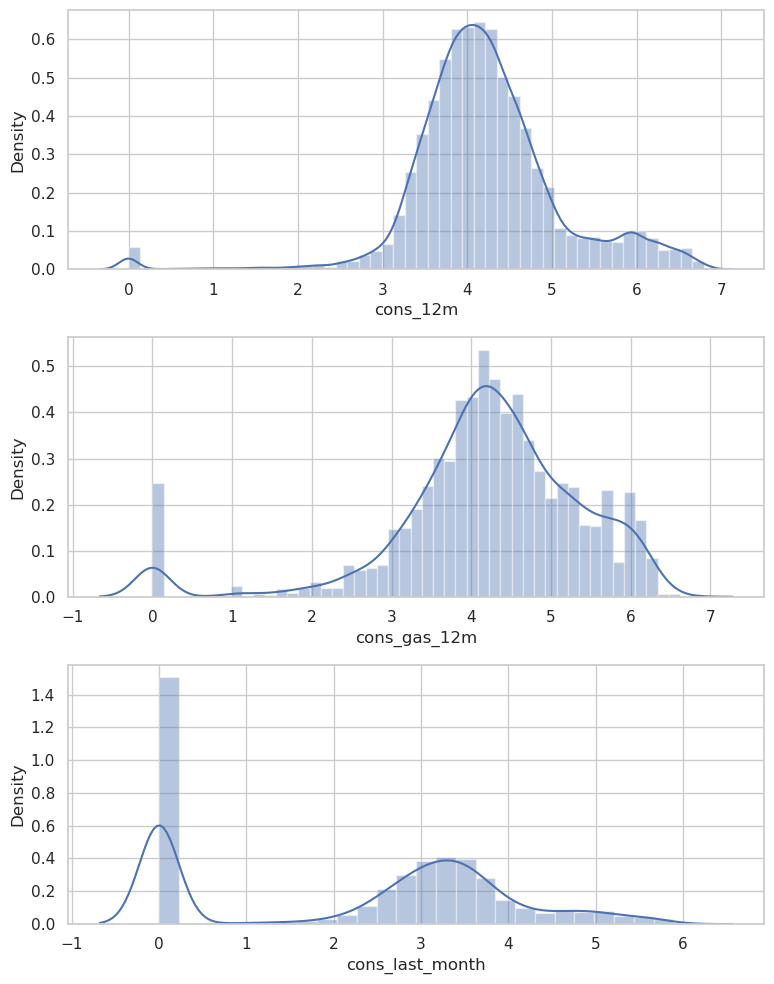

In [41]:
fig, axs = plt.subplots(nrows=3, figsize=(8,10))
# Plot histograms
sns.distplot((clients["cons_12m"].dropna()), ax=axs[0])
sns.distplot((clients[clients["has_gas"]=='t']["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((clients["cons_last_month"].dropna()), ax=axs[2])
plt.tight_layout()
plt.show()

## **6. Takeaways**

Some takeaways from this section:

***

- Our colleagues had added some new features into the dataset, which gave us some ideas for further feature engineering

***

- Furthermore, we were asked to test another hypothesis regarding regarding **off-peak prices** for our client's customers, preliminary indicators based on **linear correlation** didn't suggest that it will be any more relevant than others we have already created, however we need to check this hypothesis when we will create our model

***

- Building upon these ideas, we utilised the **`price`** dataset, in order to extract other features such as the maximum difference between a customer's electricity pricings, something we didn't do in our **EDA**

***

- We also added another interesting feature, which represents the number of years the customer is a client; we noted that this could be a feature that helps the model differentiate between the two targets

***

- Lastly, we decided upon creating **transformations** for some of the columns that had highly skewed univariate data distributions, for models based on trees, this won't really be relevant, however it is still good practice

***

It must be noted that our takaways don't really take us anywhere without an interation of modeling, which we need to do and asssess which features are more relevant since feature engineering is an iterative process of trial and error